In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autotime
%matplotlib inline 

In [2]:
with open('all_pipelines/38_sick.json') as f:
    data = json.load(f)

time: 240 ms


In [3]:
pipelines = {}
for pipeline in data:
    accuracy = pipeline['metrics']['score']
    if accuracy is not None:
        name = pipeline['pipeline']['steps'][-1]['primitive']['name']
        if name in pipelines:
            pipelines[name].append(accuracy)
        else:
            pipelines[name] = [accuracy]

time: 10.1 ms


In [4]:
pipes = []
scores = []
for pipeline,accuracies in pipelines.items():
    pipes.extend(np.repeat(pipeline,len(accuracies)))
    scores.extend(accuracies)

time: 5.52 ms


In [5]:
pipeline_accuracies = pd.DataFrame(data=list(map(list, zip(*[pipes,scores]))),columns=["Name", "Accuracy"])

time: 6.89 ms


In [6]:
mean_pipeline_accuracies = pd.DataFrame(columns=["Name", "Accuracy", "Count", "SD"])

time: 4.61 ms


In [7]:
names = []
accuracies = []
counts = []
sds = []
for pipe,accuracy in pipelines.items():
    names.append(pipe)
    accuracies.append(np.median(accuracy))
    counts.append(len(accuracy))
    sds.append(np.std(accuracy))

time: 8.39 ms


In [8]:
mean_pipeline_accuracies = pd.DataFrame(data=list(map(list, zip(*[names,accuracies,counts,sds]))),
                                        columns=["Name", "Accuracy", "Count", "SD"])

time: 4.97 ms


In [9]:
mean_pipeline_accuracies = mean_pipeline_accuracies.sort_values(by=['Accuracy'], ascending=False)

time: 3.66 ms


In [32]:
# Data manipulation for plotting
counts = list(mean_pipeline_accuracies['Count'])
names = list(mean_pipeline_accuracies['Name'])
names_counts = []
for idx in range(len(counts)):
    names_counts.append(names[idx] + " : " + str(counts[idx]))

time: 3.78 ms


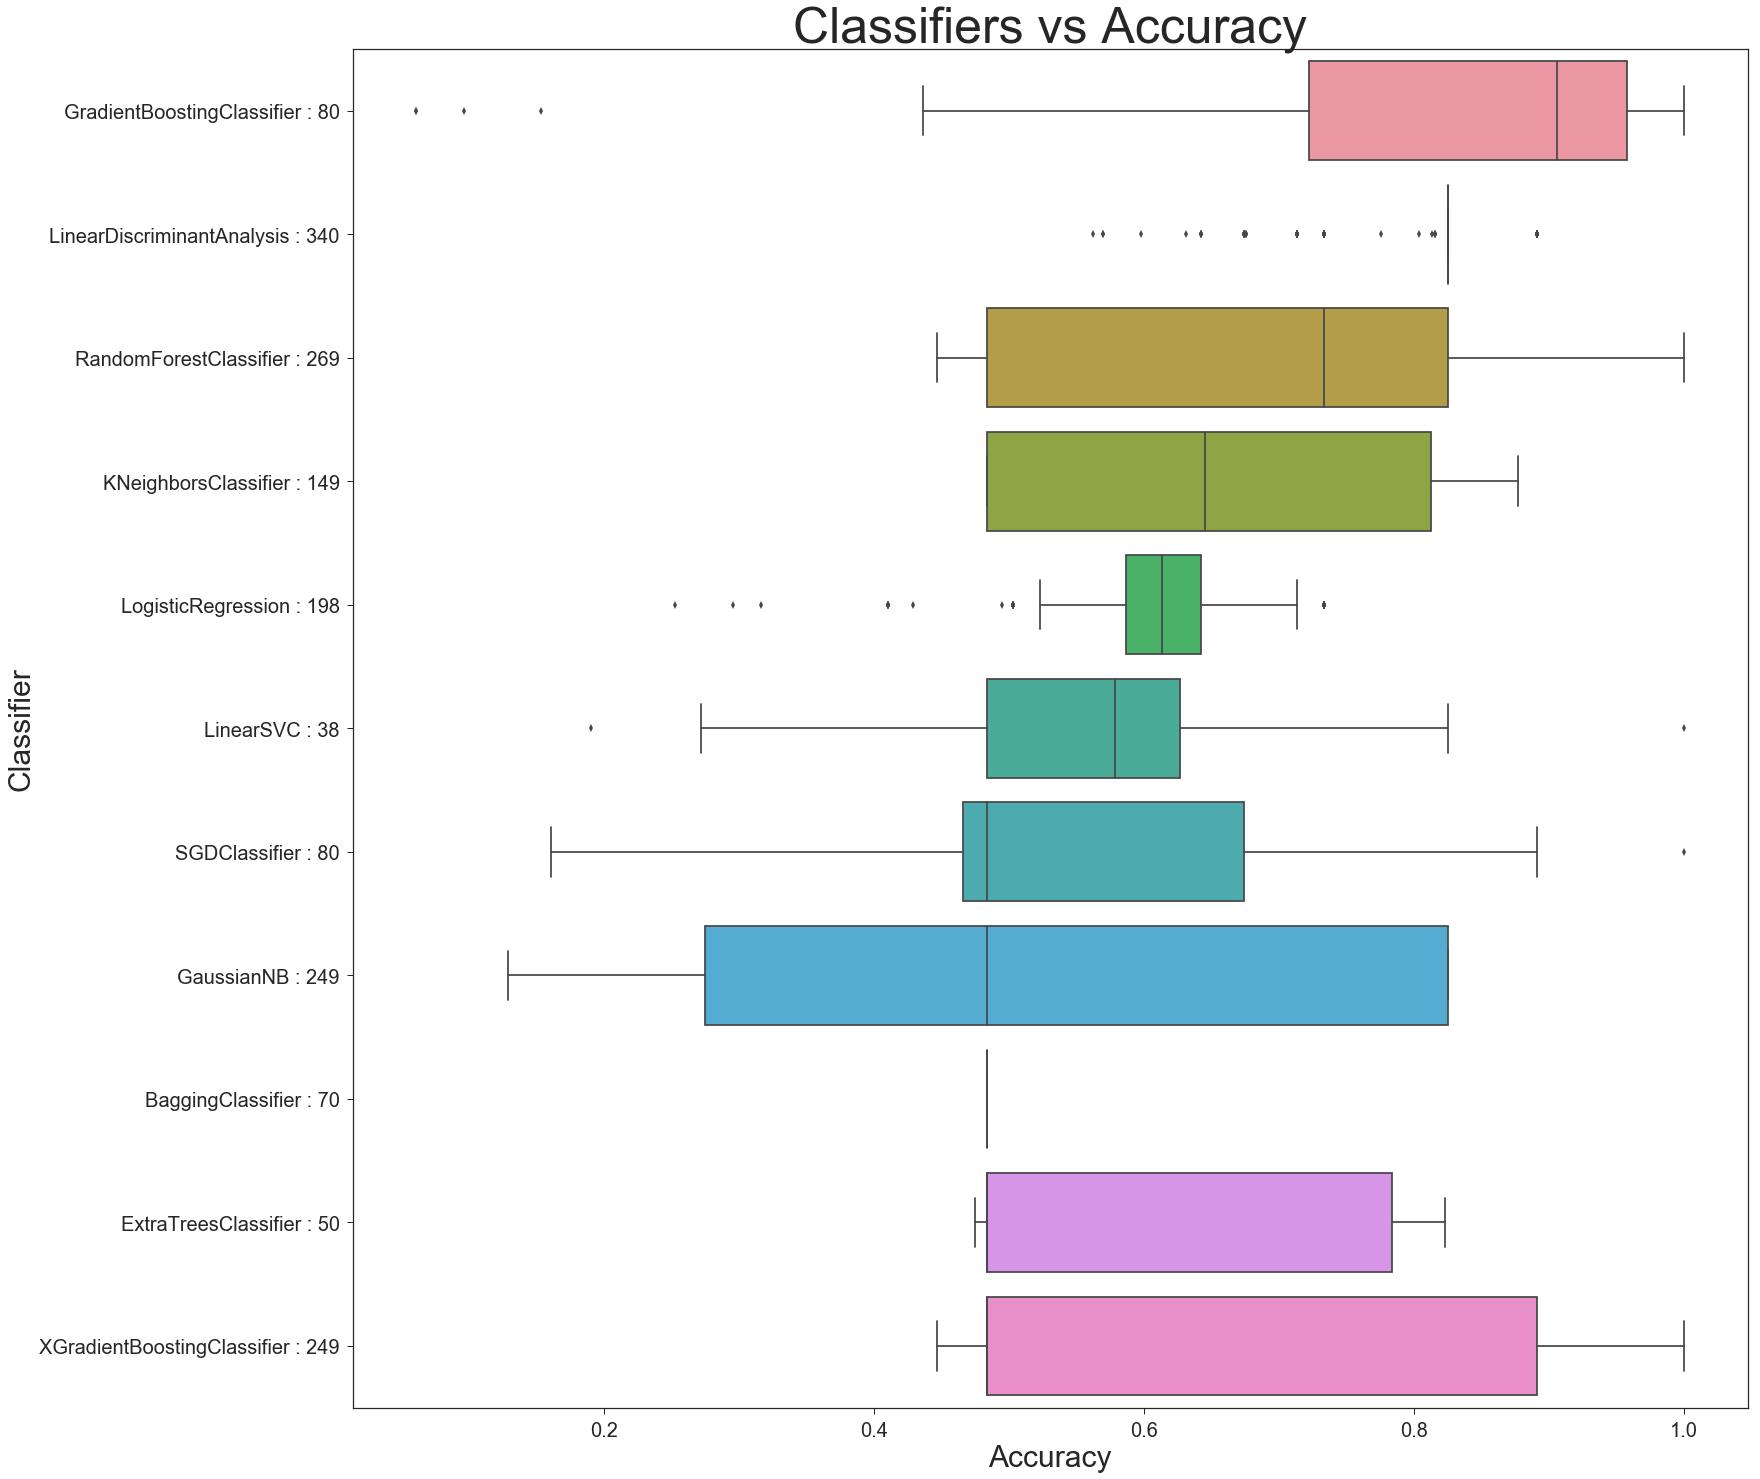

time: 1.38 s


In [34]:
# Boxplots for adjusted accuracy of sklearn flows
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(25, 25))
plot = sns.boxplot(y="Name", x="Accuracy", data = pipeline_accuracies, order=list(mean_pipeline_accuracies['Name']))
plot.set_xlabel("Accuracy",fontsize=30)
plot.set_ylabel("Classifier",fontsize=30)
plot.set_title("Classifiers vs Accuracy", fontsize=50)
plot.tick_params(labelsize=20)
plot.set_yticklabels(names_counts)
#plot.plot([0,0], [-5,35], 'r--', linewidth = 5)